In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 한글폰트 설정

In [67]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family



# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

%config InlineBackend.figure_format = 'retina'

In [68]:
df = pd.read_csv("./data/서울시_기간별_일평균_대기환경_정보.csv",encoding='cp949')
df.shape

(9050, 9)

In [69]:
df = df.sort_values('측정일자')

In [70]:
df = df.set_index('측정일자')

## 중복값 확인 및 제거

In [71]:
df.duplicated().any()

True

## 데이터 타입 확인

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9050 entries, 20210524 to 20220524
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   권역명           9050 non-null   object 
 1   측정소명          9050 non-null   object 
 2   미세먼지(㎍/㎥)     9050 non-null   int64  
 3   초미세먼지(㎍/㎥)    9050 non-null   int64  
 4   오존(ppm)       9050 non-null   float64
 5   이산화질소농도(ppm)  9050 non-null   float64
 6   일산화탄소농도(ppm)  9050 non-null   float64
 7   아황산가스농도(ppm)  9050 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 636.3+ KB


## 이상치 확인 및 제거

In [73]:
# 결측치 확인
df.isnull().sum()

권역명             0
측정소명            0
미세먼지(㎍/㎥)       0
초미세먼지(㎍/㎥)      0
오존(ppm)         0
이산화질소농도(ppm)    0
일산화탄소농도(ppm)    0
아황산가스농도(ppm)    0
dtype: int64

In [74]:
# IQR / outlier 제거
q1=df['미세먼지(㎍/㎥)'].quantile(0.25)
q3=df['미세먼지(㎍/㎥)'].quantile(0.75)
iqr=q3-q1

condition=df['미세먼지(㎍/㎥)']>q3+1.5*iqr
a=df[condition].index
df.drop(a,inplace=True)
# df.plot(kind='scatter',x='미세먼지(㎍/㎥)',y='초미세먼지(㎍/㎥)')

## 전체 수치 변수의 히스토그램 그리기

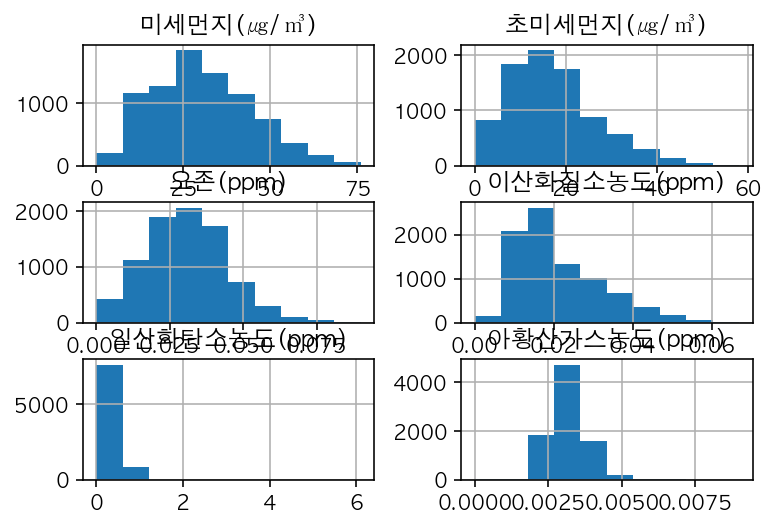

In [75]:
_ = df.hist()

## 수치 데이터 기술통계 구하기

In [76]:
df.describe()

,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,30.552285,17.171276,0.030302,0.021277,0.442184,0.003024
std,14.129410,9.629311,0.013846,0.010730,0.166783,0.000773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,10.000000,0.021000,0.013000,0.300000,0.003000
50%,29.000000,16.000000,0.030000,0.019000,0.400000,0.003000
75%,40.000000,23.000000,0.039000,0.027000,0.500000,0.003000
max,76.000000,58.000000,0.090000,0.067000,6.100000,0.009000


## 범주 데이터 기술통계 구하기

In [77]:
df.describe(include='object')

,권역명,측정소명
count,8425,8425
unique,5,25
top,동북권,광진구
freq,2696,337


## 파생변수 만들기

In [78]:
df['먼지((㎍/㎥))'] = (df['미세먼지(㎍/㎥)']+df['초미세먼지(㎍/㎥)'])
df

,권역명,측정소명,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),먼지((㎍/㎥))
측정일자,,,,,,,,,
20210526,동북권,광진구,45,15,0.038,0.018,0.3,0.004,60
20210526,동북권,동대문구,46,15,0.042,0.018,0.4,0.003,61
20210526,동북권,중랑구,45,14,0.037,0.020,0.4,0.003,59
20210526,동북권,성동구,42,15,0.049,0.021,0.4,0.003,57
20210526,서북권,마포구,41,14,0.039,0.018,0.3,0.003,55
...,...,...,...,...,...,...,...,...,...
20220524,동남권,서초구,37,20,0.043,0.020,0.3,0.003,57
20220524,동남권,송파구,36,20,0.036,0.022,0.3,0.003,56
20220524,동남권,강동구,35,19,0.042,0.017,0.3,0.003,54


## 상관계수 구하기

In [79]:
df.corr()

,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),먼지((㎍/㎥))
미세먼지(㎍/㎥),1.000000,0.905334,-0.019674,0.573716,0.561800,0.439550,0.984355
초미세먼지(㎍/㎥),0.905334,1.000000,-0.062415,0.600675,0.611480,0.436462,0.966001
오존(ppm),-0.019674,-0.062415,1.000000,-0.586784,-0.407069,-0.139833,-0.037871
이산화질소농도(ppm),0.573716,0.600675,-0.586784,1.000000,0.693602,0.490161,0.598457
일산화탄소농도(ppm),0.561800,0.611480,-0.407069,0.693602,1.000000,0.449805,0.595686
아황산가스농도(ppm),0.439550,0.436462,-0.139833,0.490161,0.449805,1.000000,0.448655
먼지((㎍/㎥)),0.984355,0.966001,-0.037871,0.598457,0.595686,0.448655,1.000000


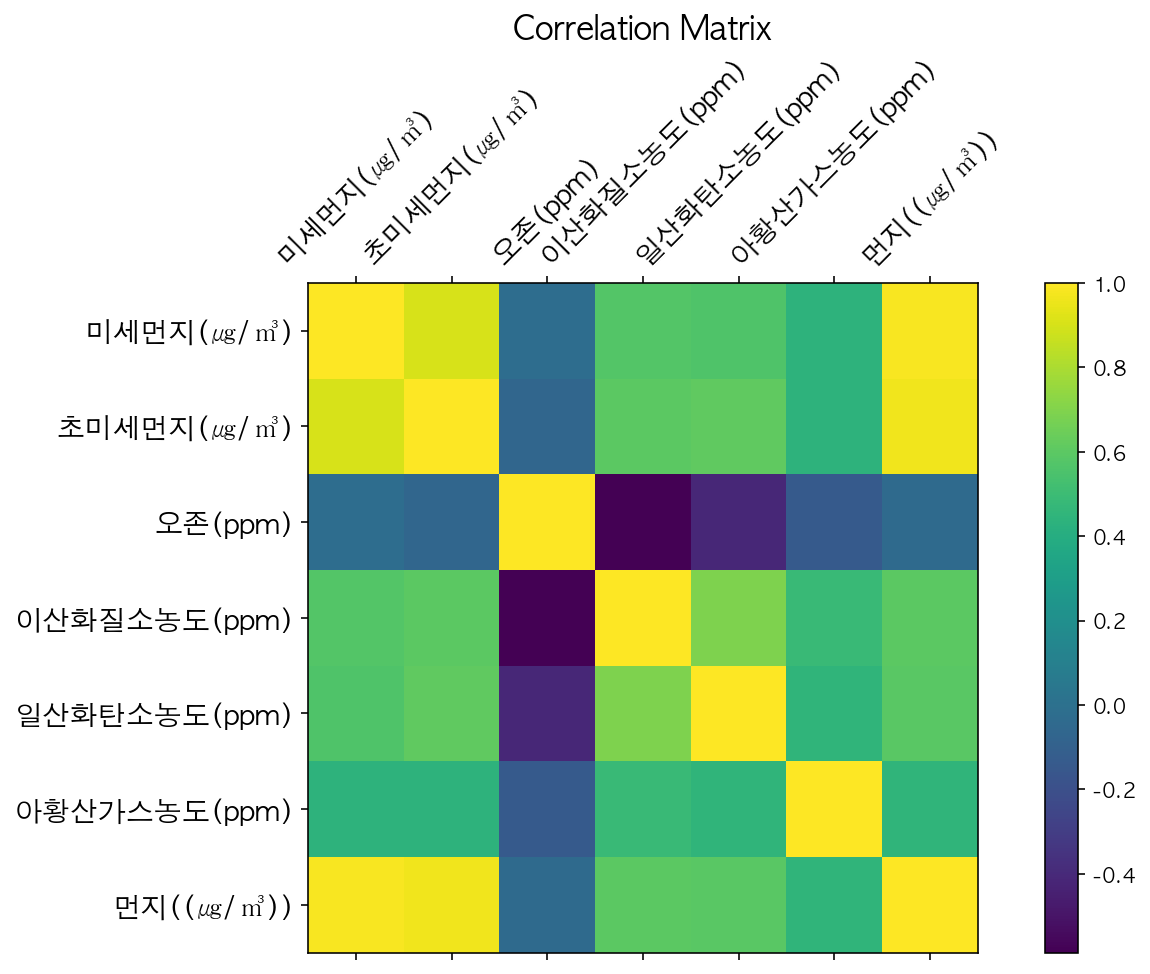

In [80]:
f = plt.figure(figsize=(12, 6))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=16);

## 빈도수 구하기

In [81]:
df['권역명'].value_counts(normalize=True)*100

동북권    32.0
서남권    28.0
동남권    16.0
서북권    12.0
도심권    12.0
Name: 권역명, dtype: float64

## 데이터 집계 (groupby, privot_table)

In [82]:
df_area = df.groupby(by='권역명').sum()

In [83]:
df_center = pd.pivot_table(data=df, columns='측정소명', aggfunc='mean')
df_center

측정소명,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
먼지((㎍/㎥)),46.397626,49.026706,49.376855,50.534125,46.305638,46.471810,46.946588,48.201780,50.026706,46.314540,...,46.925816,46.712166,48.738872,51.261128,48.620178,46.442136,47.480712,48.169139,48.100890,46.652819
미세먼지(㎍/㎥),29.780415,31.353116,31.958457,32.970326,29.658754,29.486647,31.317507,30.014837,30.979228,30.462908,...,31.252226,31.189911,31.439169,32.311573,30.356083,29.178042,29.255193,29.821958,29.928783,30.554896
아황산가스농도(ppm),0.003300,0.002504,0.002513,0.003513,0.003015,0.002926,0.003030,0.003347,0.002733,0.002846,...,0.003083,0.002813,0.002988,0.003166,0.002938,0.002837,0.003059,0.003341,0.003499,0.002893
오존(ppm),0.030018,0.025866,0.031721,0.030507,0.031436,0.029736,0.033365,0.029727,0.030766,0.031006,...,0.029798,0.029501,0.029306,0.029320,0.028991,0.026332,0.032383,0.031576,0.029318,0.032050
이산화질소농도(ppm),0.021552,0.020240,0.015042,0.023858,0.023712,0.019344,0.020795,0.024131,0.019617,0.015715,...,0.021947,0.023484,0.024712,0.022837,0.023991,0.019941,0.017401,0.021493,0.024433,0.020409
일산화탄소농도(ppm),0.410089,0.383086,0.383976,0.466766,0.477151,0.489911,0.401484,0.412760,0.463205,0.461128,...,0.389021,0.530267,0.473591,0.461721,0.467656,0.374184,0.507122,0.478338,0.456083,0.389911
초미세먼지(㎍/㎥),16.617211,17.673591,17.418398,17.563798,16.646884,16.985163,15.629080,18.186944,19.047478,15.851632,...,15.673591,15.522255,17.299703,18.949555,18.264095,17.264095,18.225519,18.347181,18.172107,16.097923


<AxesSubplot:xlabel='권역명'>

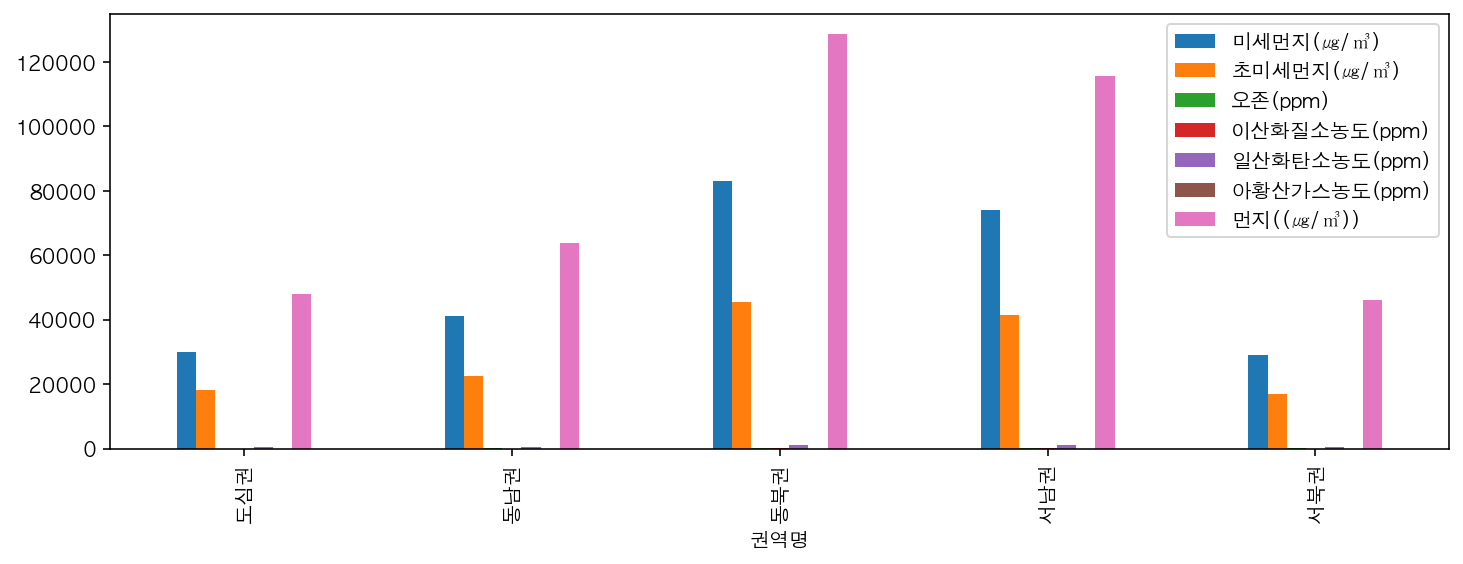

In [84]:
df_area.plot(kind='bar', figsize=(12,4))